# Esercizi 

Qui di seguito troverai alcune matrici scaricate gratuitamente dal web (trovate i file nella cartella 'matrici_test' in 'Materiali per gli studenti del MOOC', accessibile dall'indice del corso). Utilizzando i codici visti durante la scorsa videolezione, calcola per ognuna di queste matrici:
1.  la decomposizione LU con pivoting parziale (`permc_spec = 'NATURAL'`)
2.  la decomposizione LU con pivoting totale utilizzando l'algoritmo COLumn Approximate Miminum Degree(`permc_spec = 'COLAMD'`)
3. la decomposizione LU con pivoting parzione della matrice riordinata con l'algoritmo Reverse Cuthill-Mckee (`scipy.sparse.csgraph.reverse_cuthill_mckee`), avendo cura di specificare se il pattern della matrice e' simmetrico o meno

Visualizza il pattern dei fattori L,U e, solo nel punto 2, calcola la matrice permutata e visualizzane il pattern.



In [42]:
import numpy as np
from scipy.io import mmread
import scipy
import scipy.sparse.linalg as sla
from scipy.sparse import coo_matrix
from scipy.sparse.csgraph import reverse_cuthill_mckee as rcm
from scipy.io import mmread
import matplotlib.pyplot as plt

### Esempio 1

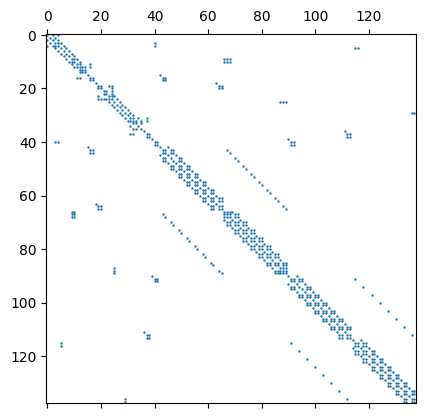

In [43]:
cartella = './matrici_test/'
A = mmread(cartella+'bcsstk22.mtx').tocsc() #matrice SPD abbastanza malcondizionata (1e+5)
plt.spy(A, markersize = 0.7)

Text(0.5, 1.0, 'Pivoting parziale con RMC: U')

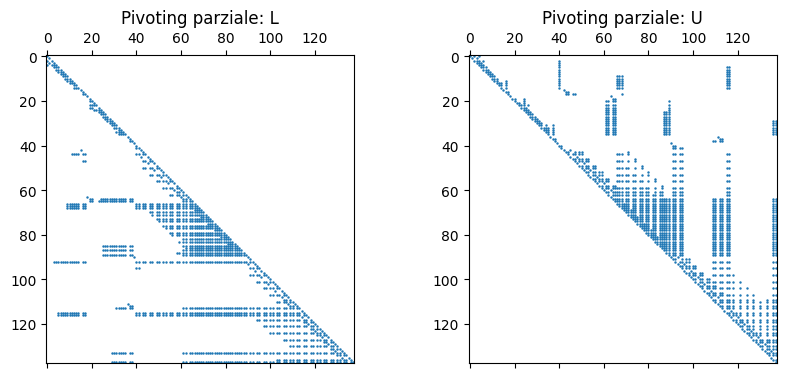

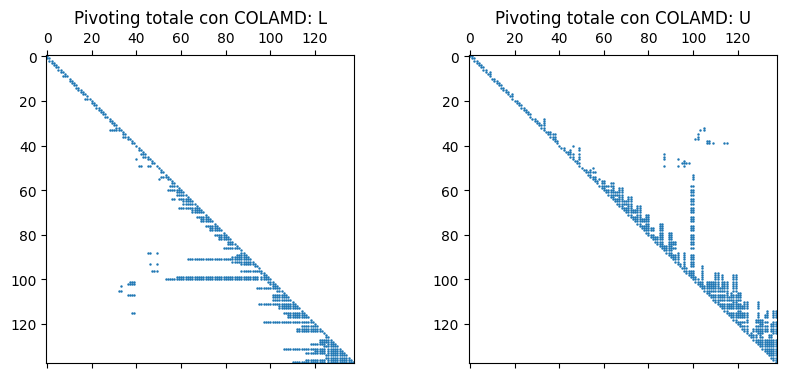

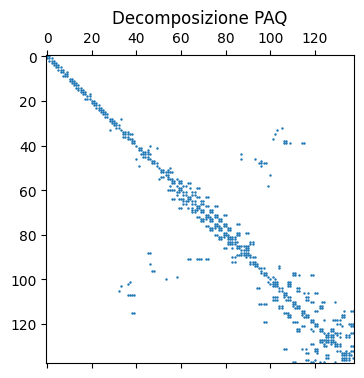

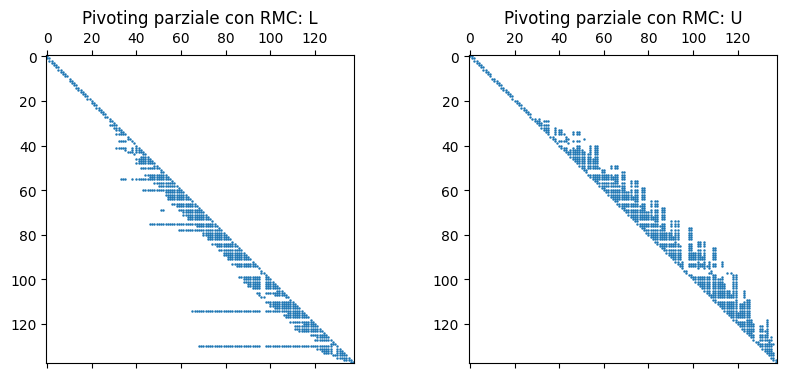

In [44]:
# LU 
LU = sla.splu(A, permc_spec = 'NATURAL')
plt.figure(figsize=(10,4))  
plt.subplot(1,2,1)
plt.spy(LU.L, markersize = 0.7)
plt.title('Pivoting parziale: L')
plt.subplot(1,2,2)
plt.spy(LU.U, markersize = 0.7)
plt.title('Pivoting parziale: U')


# COLAMD
LU = sla.splu(A, permc_spec = 'COLAMD')
plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1)
plt.spy(LU.L, markersize = 0.7)
plt.title('Pivoting totale con COLAMD: L')
plt.subplot(1,2,2)
plt.spy(LU.U, markersize = 0.7)
plt.title('Pivoting totale con COLAMD: U')

# Permutazione
n = int(np.sqrt(np.prod(A.shape)))
P = coo_matrix((np.ones(n), (LU.perm_r, np.arange(n))) ).tocsc()
Q = coo_matrix((np.ones(n), (np.arange(n), LU.perm_c)) ).tocsc()
Aperm = P*A*Q
plt.figure(figsize=(6,4))
plt.spy(Aperm, markersize = 0.7)
plt.title('Decomposizione PAQ')


# RCM
perm = rcm(A, symmetric_mode=True)
Aperm = A[perm,:][:,perm]

LU = sla.splu(Aperm, permc_spec = 'NATURAL')
plt.figure(figsize=(10,4))  
plt.subplot(1,2,1)
plt.spy(LU.L, markersize = 0.7)
plt.title('Pivoting parziale con RMC: L')
plt.subplot(1,2,2)
plt.spy(LU.U, markersize = 0.7)
plt.title('Pivoting parziale con RMC: U')

### Esempio 2

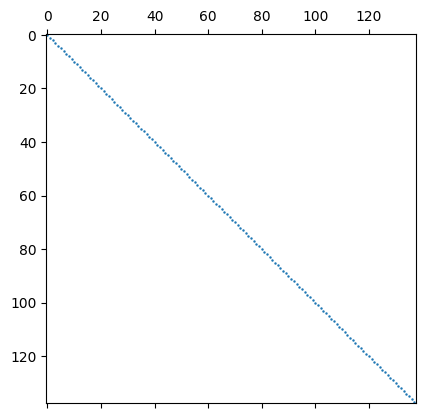

In [45]:
A = mmread(cartella+'bcsstm22.mtx').tocsc() #matrice SPD ben condizionata (1e+2)
plt.spy(A, markersize = 0.7)

Text(0.5, 1.0, 'Pivoting parziale con RMC: U')

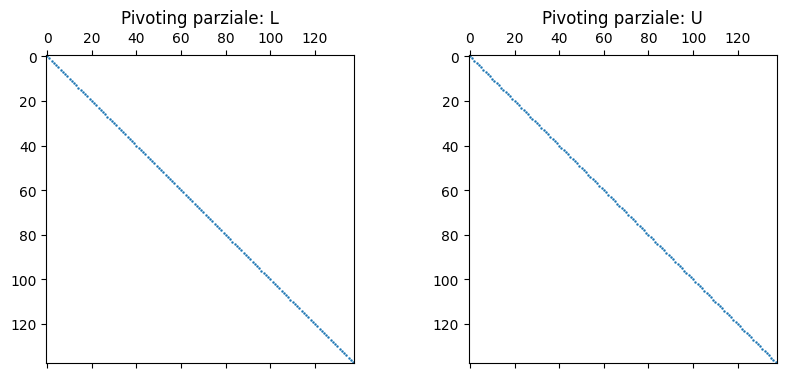

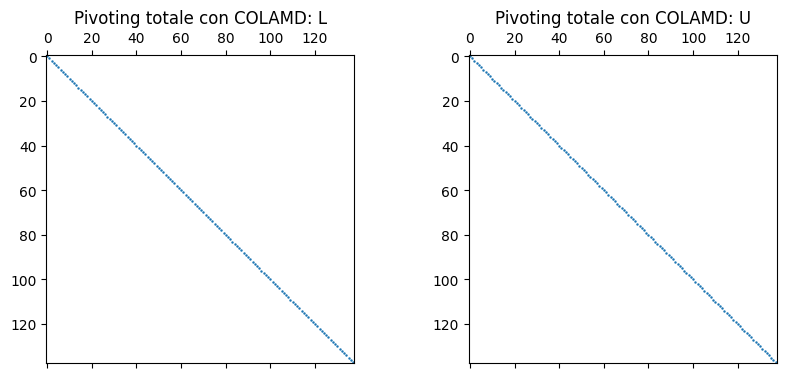

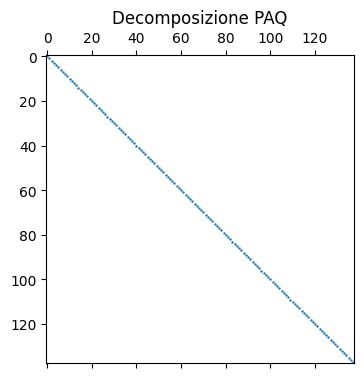

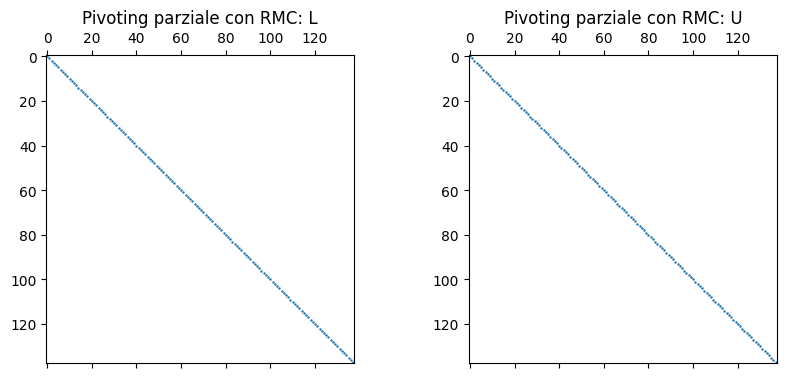

In [46]:
# LU 
LU = sla.splu(A, permc_spec = 'NATURAL')
plt.figure(figsize=(10,4))  
plt.subplot(1,2,1)
plt.spy(LU.L, markersize = 0.7)
plt.title('Pivoting parziale: L')
plt.subplot(1,2,2)
plt.spy(LU.U, markersize = 0.7)
plt.title('Pivoting parziale: U')


# COLAMD
LU = sla.splu(A, permc_spec = 'COLAMD')
plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1)
plt.spy(LU.L, markersize = 0.7)
plt.title('Pivoting totale con COLAMD: L')
plt.subplot(1,2,2)
plt.spy(LU.U, markersize = 0.7)
plt.title('Pivoting totale con COLAMD: U')

# Permutazione
n = int(np.sqrt(np.prod(A.shape)))
P = coo_matrix((np.ones(n), (LU.perm_r, np.arange(n))) ).tocsc()
Q = coo_matrix((np.ones(n), (np.arange(n), LU.perm_c)) ).tocsc()
Aperm = P*A*Q
plt.figure(figsize=(6,4))
plt.spy(Aperm, markersize = 0.7)
plt.title('Decomposizione PAQ')


# RCM
perm = rcm(A, symmetric_mode=True)
Aperm = A[perm,:][:,perm]

LU = sla.splu(Aperm, permc_spec = 'NATURAL')
plt.figure(figsize=(10,4))  
plt.subplot(1,2,1)
plt.spy(LU.L, markersize = 0.7)
plt.title('Pivoting parziale con RMC: L')
plt.subplot(1,2,2)
plt.spy(LU.U, markersize = 0.7)
plt.title('Pivoting parziale con RMC: U')

### Esempio 3

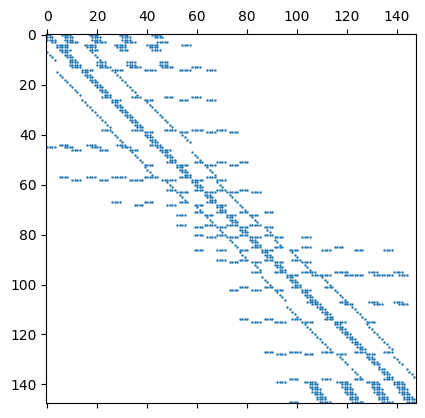

In [47]:
A = mmread(cartella+'cz148.mtx').tocsc() #matrice non simmetrica, non PD, ben condizionata (1e+3)
plt.spy(A, markersize = 0.7)

Text(0.5, 1.0, 'Pivoting parziale con RMC: U')

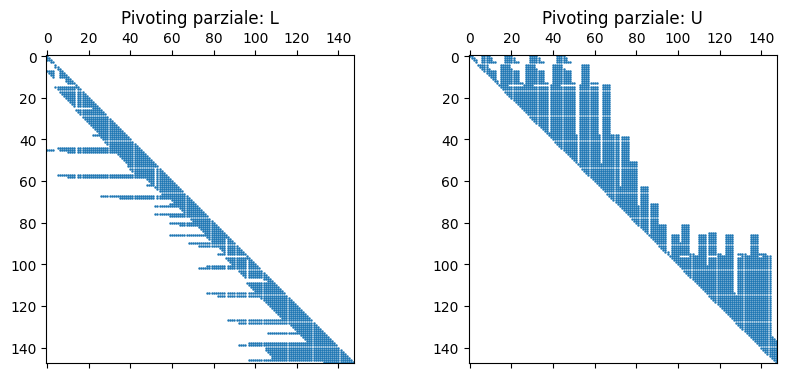

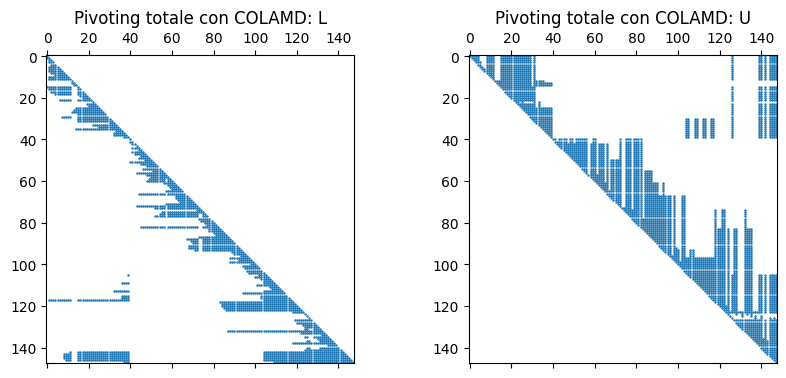

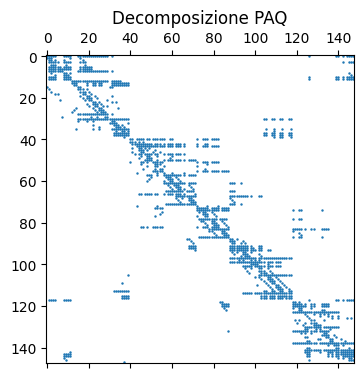

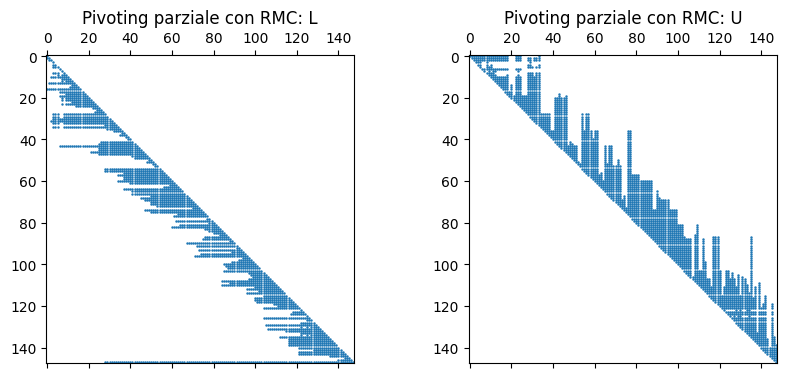

In [48]:
# LU 
LU = sla.splu(A, permc_spec = 'NATURAL')
plt.figure(figsize=(10,4))  
plt.subplot(1,2,1)
plt.spy(LU.L, markersize = 0.7)
plt.title('Pivoting parziale: L')
plt.subplot(1,2,2)
plt.spy(LU.U, markersize = 0.7)
plt.title('Pivoting parziale: U')


# COLAMD
LU = sla.splu(A, permc_spec = 'COLAMD')
plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1)
plt.spy(LU.L, markersize = 0.7)
plt.title('Pivoting totale con COLAMD: L')
plt.subplot(1,2,2)
plt.spy(LU.U, markersize = 0.7)
plt.title('Pivoting totale con COLAMD: U')

# Permutazione
n = int(np.sqrt(np.prod(A.shape)))
P = coo_matrix((np.ones(n), (LU.perm_r, np.arange(n))) ).tocsc()
Q = coo_matrix((np.ones(n), (np.arange(n), LU.perm_c)) ).tocsc()
Aperm = P*A*Q
plt.figure(figsize=(6,4))
plt.spy(Aperm, markersize = 0.7)
plt.title('Decomposizione PAQ')


# RCM
perm = rcm(A, symmetric_mode=False)
Aperm = A[perm,:][:,perm]

LU = sla.splu(Aperm, permc_spec = 'NATURAL')
plt.figure(figsize=(10,4))  
plt.subplot(1,2,1)
plt.spy(LU.L, markersize = 0.7)
plt.title('Pivoting parziale con RMC: L')
plt.subplot(1,2,2)
plt.spy(LU.U, markersize = 0.7)
plt.title('Pivoting parziale con RMC: U')

### Esempio 4

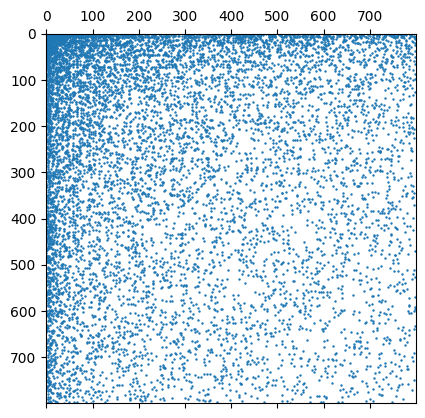

In [49]:
A = mmread(cartella+'G14.mtx').tocsc() #matrice simmetrica, non PD, non malcondizionata (1e+3)
plt.spy(A, markersize = 0.7)

Text(0.5, 1.0, 'Pivoting parziale con RMC: U')

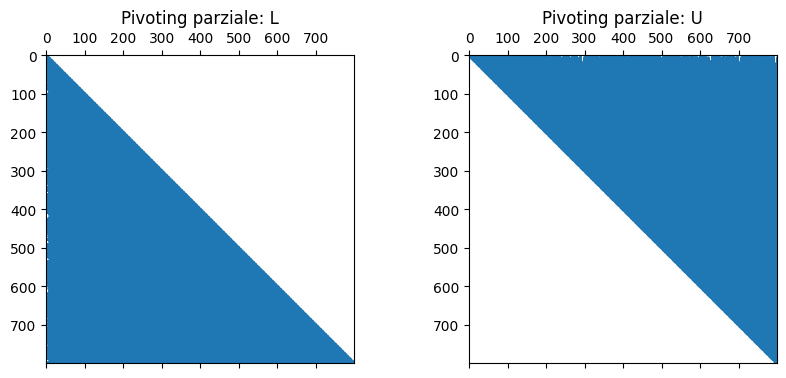

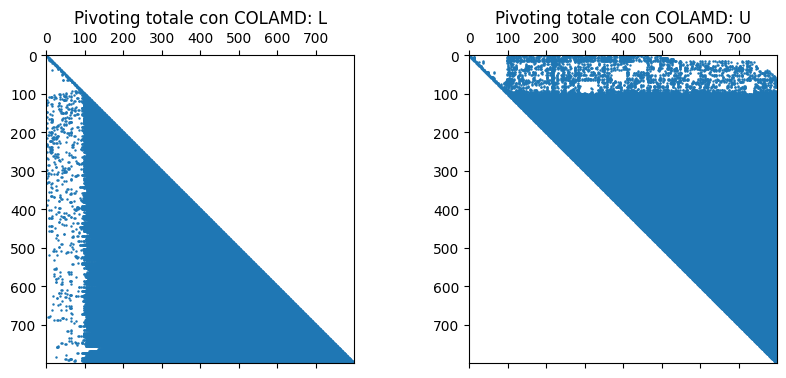

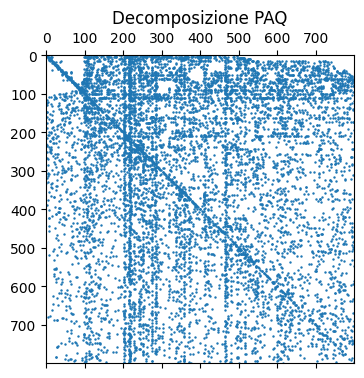

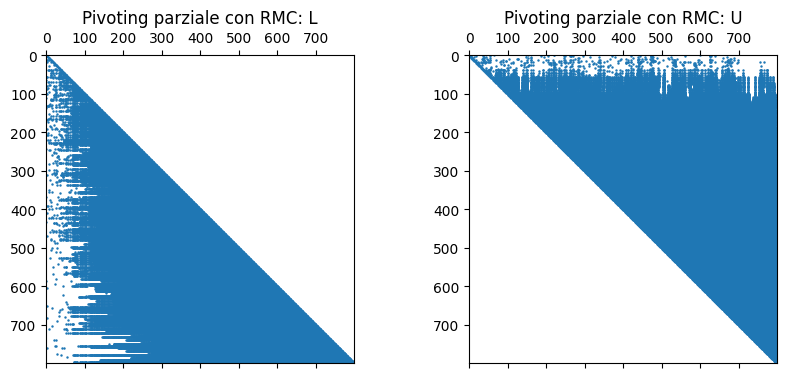

In [50]:
# LU 
LU = sla.splu(A, permc_spec = 'NATURAL')
plt.figure(figsize=(10,4))  
plt.subplot(1,2,1)
plt.spy(LU.L, markersize = 0.7)
plt.title('Pivoting parziale: L')
plt.subplot(1,2,2)
plt.spy(LU.U, markersize = 0.7)
plt.title('Pivoting parziale: U')


# COLAMD
LU = sla.splu(A, permc_spec = 'COLAMD')
plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1)
plt.spy(LU.L, markersize = 0.7)
plt.title('Pivoting totale con COLAMD: L')
plt.subplot(1,2,2)
plt.spy(LU.U, markersize = 0.7)
plt.title('Pivoting totale con COLAMD: U')

# Permutazione
n = int(np.sqrt(np.prod(A.shape)))
P = coo_matrix((np.ones(n), (LU.perm_r, np.arange(n))) ).tocsc()
Q = coo_matrix((np.ones(n), (np.arange(n), LU.perm_c)) ).tocsc()
Aperm = P*A*Q
plt.figure(figsize=(6,4))
plt.spy(Aperm, markersize = 0.7)
plt.title('Decomposizione PAQ')


# RCM
perm = rcm(A, symmetric_mode=True)
Aperm = A[perm,:][:,perm]

LU = sla.splu(Aperm, permc_spec = 'NATURAL')
plt.figure(figsize=(10,4))  
plt.subplot(1,2,1)
plt.spy(LU.L, markersize = 0.7)
plt.title('Pivoting parziale con RMC: L')
plt.subplot(1,2,2)
plt.spy(LU.U, markersize = 0.7)
plt.title('Pivoting parziale con RMC: U')

### Esempio 5

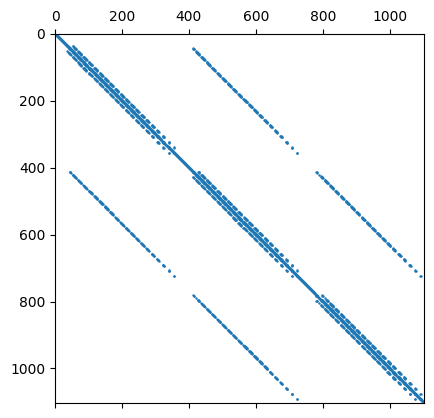

In [51]:
A = mmread(cartella+'sherman4.mtx').tocsc() #matrice non simmetrica, pattern simmetrico, non PD, non malcondizionata (1e+3)
plt.spy(A, markersize = 0.7)

Text(0.5, 1.0, 'Pivoting parziale con RMC: U')

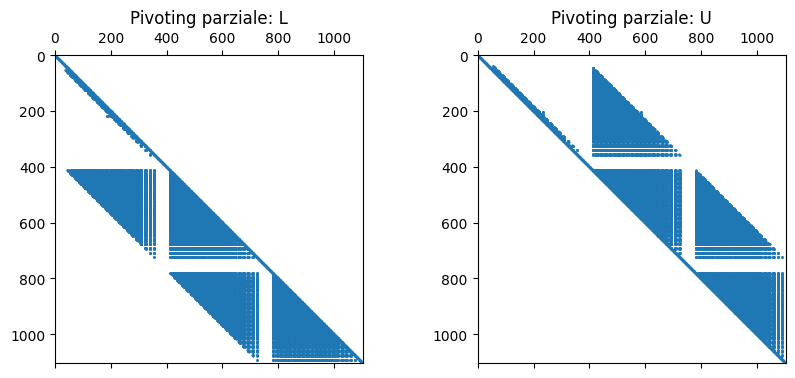

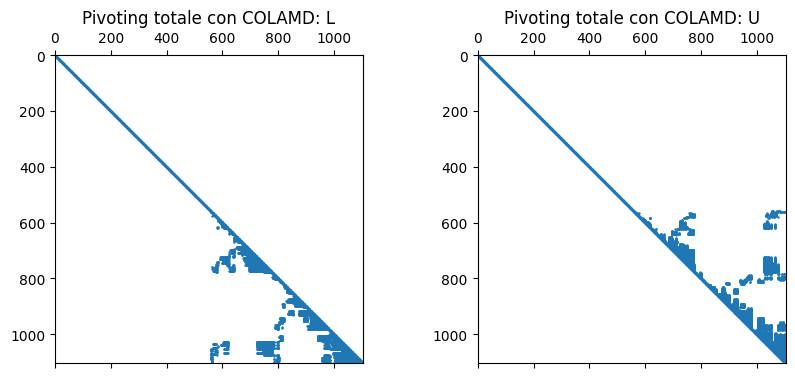

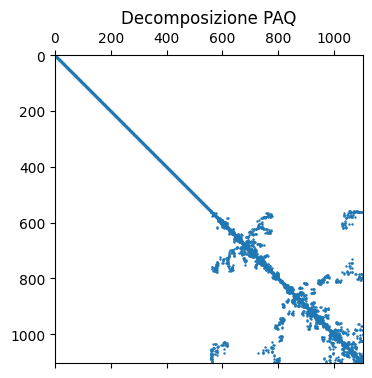

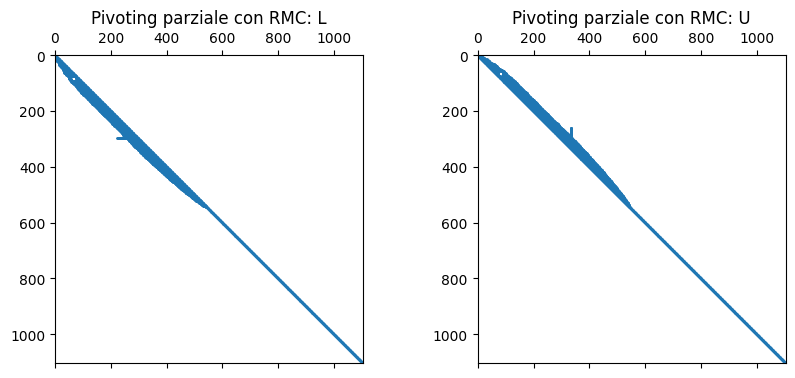

In [52]:
# LU 
LU = sla.splu(A, permc_spec = 'NATURAL')
plt.figure(figsize=(10,4))  
plt.subplot(1,2,1)
plt.spy(LU.L, markersize = 0.7)
plt.title('Pivoting parziale: L')
plt.subplot(1,2,2)
plt.spy(LU.U, markersize = 0.7)
plt.title('Pivoting parziale: U')


# COLAMD
LU = sla.splu(A, permc_spec = 'COLAMD')
plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1)
plt.spy(LU.L, markersize = 0.7)
plt.title('Pivoting totale con COLAMD: L')
plt.subplot(1,2,2)
plt.spy(LU.U, markersize = 0.7)
plt.title('Pivoting totale con COLAMD: U')

# Permutazione
n = int(np.sqrt(np.prod(A.shape)))
P = coo_matrix((np.ones(n), (LU.perm_r, np.arange(n))) ).tocsc()
Q = coo_matrix((np.ones(n), (np.arange(n), LU.perm_c)) ).tocsc()
Aperm = P*A*Q
plt.figure(figsize=(6,4))
plt.spy(Aperm, markersize = 0.7)
plt.title('Decomposizione PAQ')


# RCM
perm = rcm(A, symmetric_mode=True)
Aperm = A[perm,:][:,perm]

LU = sla.splu(Aperm, permc_spec = 'NATURAL')
plt.figure(figsize=(10,4))  
plt.subplot(1,2,1)
plt.spy(LU.L, markersize = 0.7)
plt.title('Pivoting parziale con RMC: L')
plt.subplot(1,2,2)
plt.spy(LU.U, markersize = 0.7)
plt.title('Pivoting parziale con RMC: U')

### Esempio 6

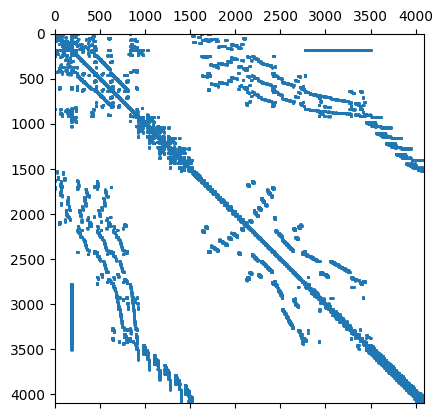

In [53]:
A = mmread(cartella+'sts4098.mtx').tocsc() #matrice SPD, abbastanza malcondizionata (1e+8)
plt.spy(A, markersize = 0.7)

Text(0.5, 1.0, 'Pivoting parziale con RMC: U')

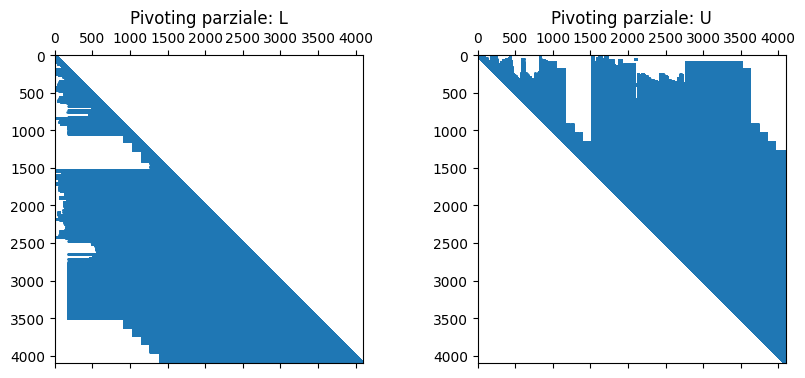

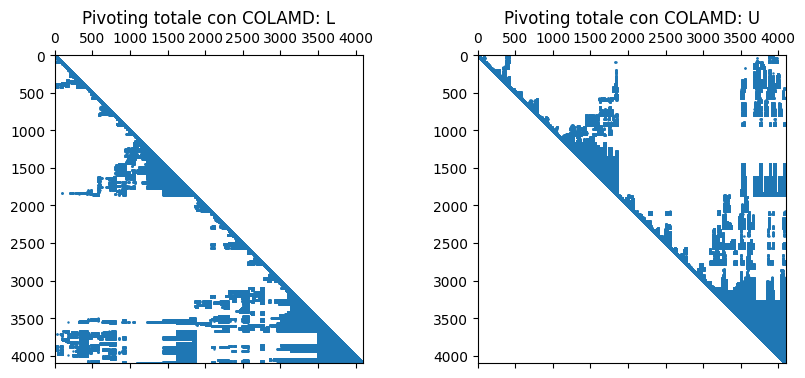

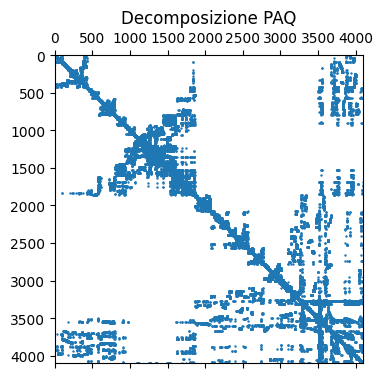

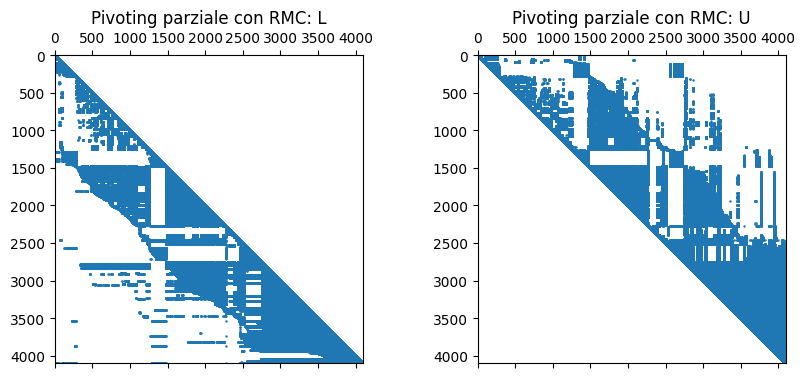

In [54]:
# LU 
LU = sla.splu(A, permc_spec = 'NATURAL')
plt.figure(figsize=(10,4))  
plt.subplot(1,2,1)
plt.spy(LU.L, markersize = 0.7)
plt.title('Pivoting parziale: L')
plt.subplot(1,2,2)
plt.spy(LU.U, markersize = 0.7)
plt.title('Pivoting parziale: U')


# COLAMD
LU = sla.splu(A, permc_spec = 'COLAMD')
plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1)
plt.spy(LU.L, markersize = 0.7)
plt.title('Pivoting totale con COLAMD: L')
plt.subplot(1,2,2)
plt.spy(LU.U, markersize = 0.7)
plt.title('Pivoting totale con COLAMD: U')

# Permutazione
n = int(np.sqrt(np.prod(A.shape)))
P = coo_matrix((np.ones(n), (LU.perm_r, np.arange(n))) ).tocsc()
Q = coo_matrix((np.ones(n), (np.arange(n), LU.perm_c)) ).tocsc()
Aperm = P*A*Q
plt.figure(figsize=(6,4))
plt.spy(Aperm, markersize = 0.7)
plt.title('Decomposizione PAQ')


# RCM
perm = rcm(A, symmetric_mode=True)
Aperm = A[perm,:][:,perm]

LU = sla.splu(Aperm, permc_spec = 'NATURAL')
plt.figure(figsize=(10,4))  
plt.subplot(1,2,1)
plt.spy(LU.L, markersize = 0.7)
plt.title('Pivoting parziale con RMC: L')
plt.subplot(1,2,2)
plt.spy(LU.U, markersize = 0.7)
plt.title('Pivoting parziale con RMC: U')